In [ ]:
import pandas as pd
import math
from matplotlib import pyplot as plt

In [ ]:
data = pd.read_csv("---------/faithful.csv")

data0 = data.iloc[:,0]
data1 = data.iloc[:,1]
data2 = data.iloc[:,2]

In [ ]:
n = len(data1)

plt.scatter(data1, data2, color = "b")
plt.xlabel("eruptions")
plt.ylabel("waiting")
plt.show()

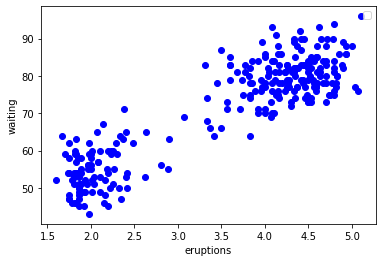

In [ ]:
def oklid(x,y,x1,y1):
    
    cluster_distance = math.sqrt((x - x1) ** 2 + (y - y1) ** 2 )
    
    return cluster_distance

In [ ]:
def distance(data_x, data_y, c1_x, c1_y, c2_x, c2_y):
    
    cluster_one_x_lord= []
    cluster_one_y_lord = []
    cluster_two_x_lord = []
    cluster_two_y_lord = []
    
    for i in range(n):
        cluster_one_distance = oklid(data_x[i], data_y[i], c1_x, c1_y)
        cluster_two_distance = oklid(data_x[i], data_y[i], c2_x, c2_y)
        
        if (cluster_one_distance < cluster_two_distance):
            cluster_one_x_lord.append(data_x[i])
            cluster_one_y_lord.append(data_y[i])
        elif (cluster_one_distance >= cluster_two_distance):
            cluster_two_x_lord.append(data_x[i])
            cluster_two_y_lord.append(data_y[i])
        
    cluster_one_total = len(cluster_one_x_lord)
    cluster_two_total = len(cluster_two_x_lord)
            
    cluster_one_x_means = round((sum(cluster_one_x_lord) / cluster_one_total),3)
    cluster_one_y_means = round((sum(cluster_one_y_lord) / cluster_one_total),3)
    
    cluster_two_x_means = round((sum(cluster_two_x_lord) / cluster_two_total),3)
    cluster_two_y_means = round((sum(cluster_two_y_lord) / cluster_two_total),3)
    
    new_c1_x = cluster_one_x_means
    new_c1_y = cluster_one_y_means
    new_c2_x = cluster_two_x_means
    new_c2_y = cluster_two_y_means
    
    
    return new_c1_x, new_c1_y, new_c2_x, new_c2_y, cluster_one_x_lord, cluster_one_y_lord, cluster_two_x_lord, cluster_two_y_lord

In [ ]:
def judge(old_c_x, old_c_y, new_c_x, new_c_y):
    
    if((old_c_x == new_c_x) and (old_c_y == new_c_y)):
        judgement = 1
    elif((old_c_x != new_c_x) and (old_c_x != new_c_y)):
        judgement = 0
    
    return judgement

In [ ]:
c1_x = 2
c1_y = 55
c2_x = 4
c2_y = 85

In [ ]:
fırst = distance(data1, data2, c1_x, c1_y, c2_x, c2_y)

second_one = judge(c1_x, c1_y, fırst[0], fırst[1]) # 0 yada 1
second_two = judge(c2_x, c2_y, fırst[2], fırst[3]) # 0 yada 1

deter_c1 = second_one
deter_c2 = second_two

In [ ]:
while((deter_c1 != 1) and (deter_c2 != 1)):
    old_c1_x = fırst[0]
    old_c1_y = fırst[1]
    old_c2_x = fırst[2]
    old_c2_y = fırst[3]
     
    
    fırst = distance(data1, data2, old_c1_x, old_c1_y, old_c2_x, old_c2_y)
    second_one = judge(old_c1_x, old_c1_y, fırst[0], fırst[1])
    
    second_two = judge(old_c2_x, old_c2_y, fırst[2], fırst[3])
    deter_c1 = second_one
    deter_c2 = second_two

In [ ]:
cluster_c1_x = fırst[4]
cluster_c1_y = fırst[5]
cluster_c2_x = fırst[6]
cluster_c2_y = fırst[7]

new_c1_x = fırst[0]
new_c1_y = fırst[1]
new_c2_x = fırst[2]
new_c2_y = fırst[3]

In [ ]:
plt.scatter(cluster_c1_x, cluster_c1_y,label = "Cluster_1", color = "c")
plt.scatter(cluster_c2_x, cluster_c2_y, label = "Cluster_2",color = "y")
plt.plot(new_c1_x, new_c1_y, "b*", label = "1" )
plt.plot(new_c2_x, new_c2_y, "r+", label = "2")
plt.xlabel("eruptions")
plt.ylabel("waiting")
plt.legend()
plt.show() 

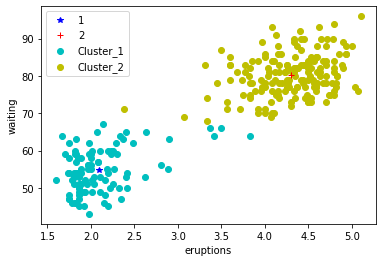